Importing the required libraries.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Exploring the dataset (EDA)

In [3]:
dataset= pd.read_csv("Solar_Prediction.csv")

In [6]:
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
1,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
2,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
3,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
4,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32685 entries, 0 to 32684
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32685 non-null  int64  
 1   Data                    32685 non-null  object 
 2   Time                    32685 non-null  object 
 3   Radiation               32685 non-null  float64
 4   Temperature             32685 non-null  int64  
 5   Pressure                32685 non-null  float64
 6   Humidity                32685 non-null  int64  
 7   WindDirection(Degrees)  32685 non-null  float64
 8   Speed                   32685 non-null  float64
 9   TimeSunRise             32685 non-null  object 
 10  TimeSunSet              32685 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [8]:
dataset.shape

(32685, 11)

In [29]:
dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268500e+04,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000
mean,1.478047e+09,207.130997,51.103350,30.422878,75.016797,143.488784,6.243888
std,3.005042e+06,315.919167,6.201228,0.054674,25.990465,83.168561,3.490525
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475547e+09,1.230000,46.000000,30.400000,56.000000,82.220000,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.240000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


from matplotlib import pyplot as plt
_df_0['UNIXTime'].plot(kind='hist', bins=20, title='UNIXTime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Radiation'].plot(kind='hist', bins=20, title='Radiation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Pressure'].plot(kind='hist', bins=20, title='Pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='UNIXTime', y='Radiation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Radiation', y='Temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Temperature', y='Pressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Pressure', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['UNIXTime']
  ys = series['Radiation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('UNIXTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UNIXTime')
_ = plt.ylabel('Radiation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['UNIXTime']
  ys = series['Temperature']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('UNIXTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UNIXTime')
_ = plt.ylabel('Temperature')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['UNIXTime']
  ys = series['Pressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('UNIXTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UNIXTime')
_ = plt.ylabel('Pressure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['UNIXTime']
  ys = series['Humidity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('UNIXTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UNIXTime')
_ = plt.ylabel('Humidity')

from matplotlib import pyplot as plt
_df_12['UNIXTime'].plot(kind='line', figsize=(8, 4), title='UNIXTime')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Radiation'].plot(kind='line', figsize=(8, 4), title='Radiation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Pressure'].plot(kind='line', figsize=(8, 4), title='Pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

Data Preprocessing (identifying the missing data, removing outliers, and cleaning data)

In [10]:
dataset.isna()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
32680,False,False,False,False,False,False,False,False,False,False,False
32681,False,False,False,False,False,False,False,False,False,False,False
32682,False,False,False,False,False,False,False,False,False,False,False
32683,False,False,False,False,False,False,False,False,False,False,False


In [12]:
dataset.isnull().count()

UNIXTime                  32685
Data                      32685
Time                      32685
Radiation                 32685
Temperature               32685
Pressure                  32685
Humidity                  32685
WindDirection(Degrees)    32685
Speed                     32685
TimeSunRise               32685
TimeSunSet                32685
dtype: int64

<Axes: xlabel='Humidity'>

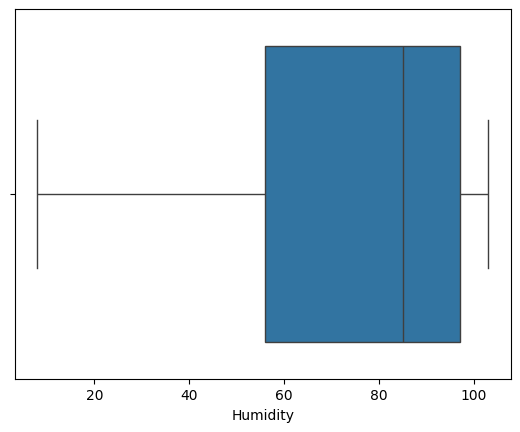

In [23]:
sns.boxplot(x=dataset['Humidity'])


<Axes: xlabel='Pressure'>

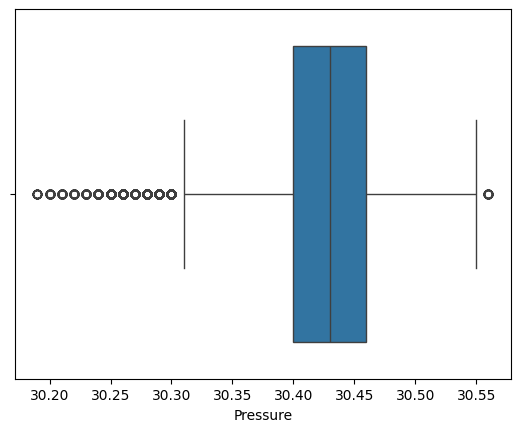

In [24]:
sns.boxplot(x=dataset['Pressure'])

<Axes: xlabel='Radiation'>

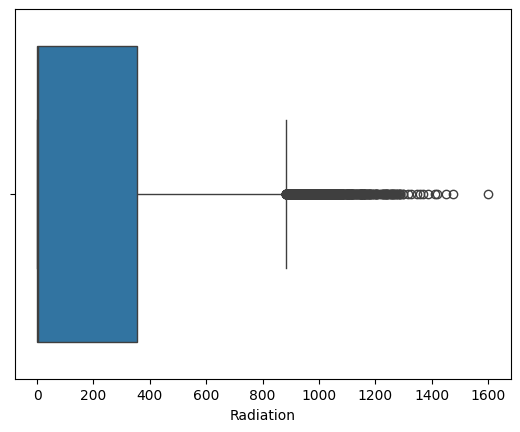

In [25]:
sns.boxplot(x=dataset['Radiation'])

<Axes: xlabel='Temperature'>

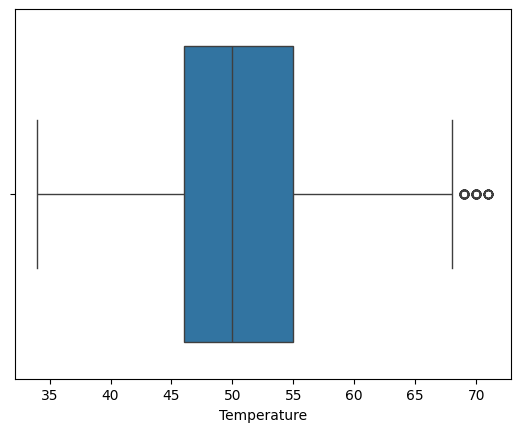

In [26]:
sns.boxplot(x=dataset['Temperature'])

<Axes: xlabel='WindDirection(Degrees)'>

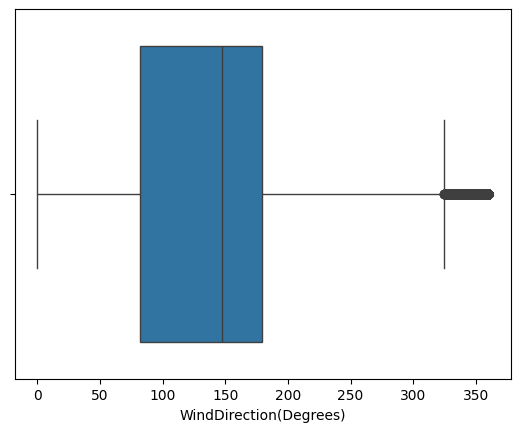

In [27]:
sns.boxplot(x=dataset['WindDirection(Degrees)'])

In [41]:
# Removing Outliers
x= dataset['Radiation'].quantile(0.25)
y= dataset['Radiation'].quantile(0.75)
print(x,y)

1.23 354.24


Feature Selection using Pearson coefficient

In [42]:
# correlation between pressure and humidity
print(dataset['Pressure'].corr(dataset['Humidity']))

-0.223963337701641


In [55]:
dataset.isnull().count()

UNIXTime                  32685
Data                      32685
Time                      32685
Radiation                 32685
Temperature               32685
Pressure                  32685
Humidity                  32685
WindDirection(Degrees)    32685
Speed                     32685
TimeSunRise               32685
TimeSunSet                32685
dtype: int64

In [56]:
data = dataset[["Pressure", "Humidity", "Radiation", "Temperature", "WindDirection(Degrees)", "Speed"]]

In [57]:
data

,Pressure,Humidity,Radiation,Temperature,WindDirection(Degrees),Speed
0,30.46,58,1.21,48,176.78,3.37
1,30.46,57,1.23,48,158.75,3.37
2,30.46,60,1.21,48,137.71,3.37
3,30.46,62,1.17,48,104.95,5.62
4,30.46,64,1.21,48,120.20,5.62
...,...,...,...,...,...,...
32680,30.43,102,1.22,44,145.42,6.75
32681,30.42,102,1.17,44,117.78,6.75
32682,30.42,102,1.20,44,145.19,9.00
32683,30.42,101,1.23,44,164.19,7.87


In [58]:
data.corr()

,Pressure,Humidity,Radiation,Temperature,WindDirection(Degrees),Speed
Pressure,1.000000,-0.223963,0.119031,0.311187,-0.229021,-0.083636
Humidity,-0.223963,1.000000,-0.226186,-0.285067,-0.001826,-0.211628
Radiation,0.119031,-0.226186,1.000000,0.734952,-0.230318,0.073624
Temperature,0.311187,-0.285067,0.734952,1.000000,-0.259417,-0.031461
WindDirection(Degrees),-0.229021,-0.001826,-0.230318,-0.259417,1.000000,0.073095
Speed,-0.083636,-0.211628,0.073624,-0.031461,0.073095,1.000000


from matplotlib import pyplot as plt
_df_16['Pressure'].plot(kind='hist', bins=20, title='Pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Humidity'].plot(kind='hist', bins=20, title='Humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Radiation'].plot(kind='hist', bins=20, title='Radiation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Pressure', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Humidity', y='Radiation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='Radiation', y='Temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='Temperature', y='WindDirection(Degrees)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Pressure'].plot(kind='line', figsize=(8, 4), title='Pressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Humidity'].plot(kind='line', figsize=(8, 4), title='Humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Radiation'].plot(kind='line', figsize=(8, 4), title='Radiation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [59]:
corrdata = data.corr().unstack().sort_values().drop_duplicates()
print(corrdata)

Humidity                Temperature              -0.285067
WindDirection(Degrees)  Temperature              -0.259417
                        Radiation                -0.230318
Pressure                WindDirection(Degrees)   -0.229021
Humidity                Radiation                -0.226186
Pressure                Humidity                 -0.223963
Speed                   Humidity                 -0.211628
                        Pressure                 -0.083636
                        Temperature              -0.031461
Humidity                WindDirection(Degrees)   -0.001826
Speed                   WindDirection(Degrees)    0.073095
Radiation               Speed                     0.073624
                        Pressure                  0.119031
Temperature             Pressure                  0.311187
Radiation               Temperature               0.734952
Pressure                Pressure                  1.000000
dtype: float64


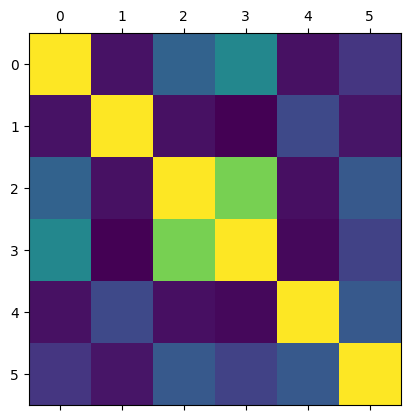

In [60]:
plt.matshow(data.corr())
plt.show()

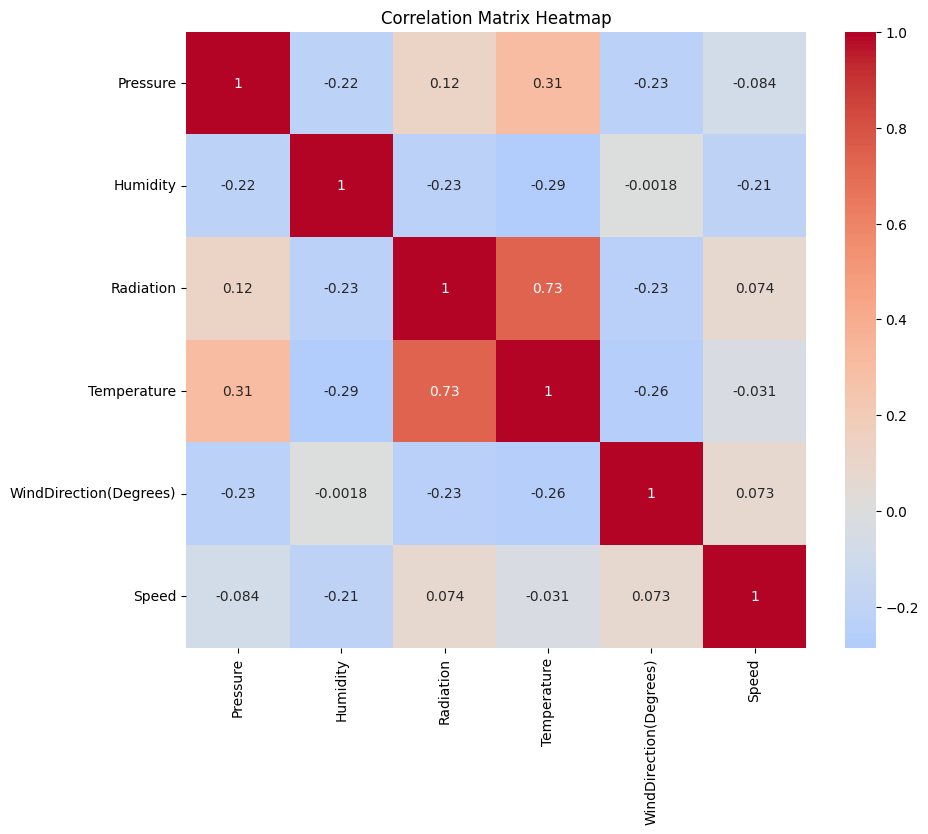

In [68]:
corr_matrix = data.corr()

#Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()